In [89]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id="main_menu")

## Objectifs

Créer un modèle statistique avec une précision de plus de 90% pour prédire les futures consommations énergétiques de la France.

## Libraries

In [10]:
import warnings   #ignorer les avertissement et conseils
warnings.filterwarnings('ignore')

### Libraries analyse

In [9]:
#ANALYSE DE DONNEES
import numpy as np  #manipulation des tableaux et calculs scientifiques 
import pandas as pd # manipulation, nettoyage, analyse de bases de donnees (documentation de 3707 pages!)

#VISUALISATION
import seaborn as sns #visualisation de donnees avec python
import matplotlib.pylab as plt #visualisation de donnees avec python

#DECISION (loi de probabilités: plus de 180 lois (une dizaine pour vous))
import scipy as sp    #faire de la statistique decisionnelle, probabilités, algebre, optimation


### Libraries série temporelle

In [12]:
import statsmodels as stm  #series temporelles (STATISTIQUES: ARIMA, SMOOTHING)

#import neuralprophet (facebook DEEP LERANING)
#import tensorflow (google DEEP LEARNING) 


## Data access

In [13]:
fichier="energie.csv"
data=pd.read_csv(fichier, sep=";")
data.sample(10)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
493,2016-02,Données définitives,Grand-Est,9739,7454.0,586,52.0,11,523,801,...,73,4385,5253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2013-01,Données définitives,Ile-de-France,870,NaN,753,195.0,37,520,0,...,112,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,2017-04,Données définitives,Nouvelle-Aquitaine,4913,4023.0,62,NaN,10,52,282,...,137,3304,1609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2015-11,Données définitives,Bretagne,339,NaN,65,NaN,1,64,44,...,26,1844,-1510.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,2016-01,Données définitives,Normandie,6117,5343.0,534,224.0,41,268,14,...,35,2968,3149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
709,2017-06,Données définitives,Occitanie,2938,1747.0,2,NaN,2,0,723,...,50,2658,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,2018-06,Données définitives,Bourgogne-Franche-Comté,206,NaN,18,NaN,0,18,61,...,21,1490,-1286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033,2019-07,Données définitives,Ile-de-France,155,NaN,16,0.0,2,14,3,...,111,4754,-4599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2013-01,Données définitives,Centre-Val de Loire,7965,7717.0,70,NaN,2,67,24,...,27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,2018-11,Données définitives,Bretagne,408,NaN,133,NaN,4,129,42,...,27,2139,-1734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data infos

In [15]:
data.columns 

Index(['Mois', 'Qualité', 'Territoire', 'Production totale',
       'Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'Consommation totale', 'Solde exportateur', 'Echanges export',
       'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique'],
      dtype='object')

In [16]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Mois                                      1403 non-null   object 
 1   Qualité                                   1403 non-null   object 
 2   Territoire                                1403 non-null   object 
 3   Production totale                         1403 non-null   int64  
 4   Production nucléaire                      913 non-null    float64
 5   Production thermique totale               1403 non-null   int64  
 6   Production thermique charbon              974 non-null    float64
 7   Production thermique fioul                1403 non-null   int64  
 8   Production thermique gaz                  1403 non-null   int64  
 9   Production hydraulique                    1403 non-null   int64  
 10  Production éolien                   

In [17]:
data.Territoire.value_counts() 

Territoire
France                     119
Grand-Est                  107
Nouvelle-Aquitaine         107
Auvergne-Rhône-Alpes       107
Bourgogne-Franche-Comté    107
Bretagne                   107
Centre-Val de Loire        107
Ile-de-France              107
Occitanie                  107
Normandie                  107
Hauts-de-France            107
PACA                       107
Pays-de-la-Loire           107
Name: count, dtype: int64

## Data query

In [20]:
data=data.query("Territoire=='France'")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [21]:
data.shape 

(119, 22)

## Analyse univariée de la consommation énergétique

<Axes: >

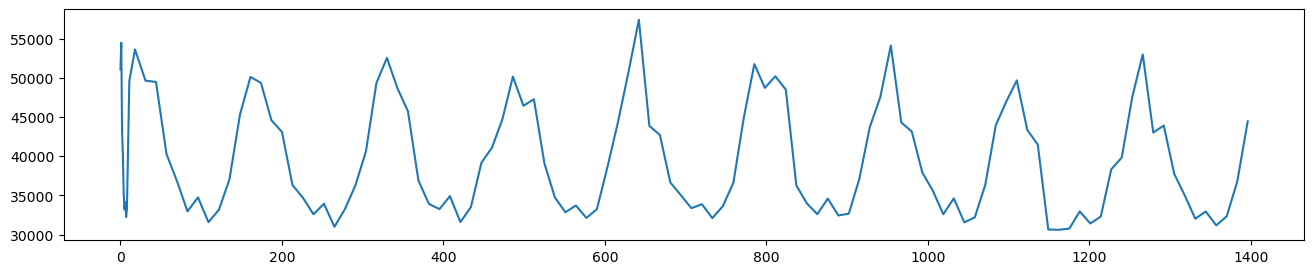

In [22]:
data["Consommation totale"].plot(figsize=(16,3))

<Axes: xlabel='Mois'>

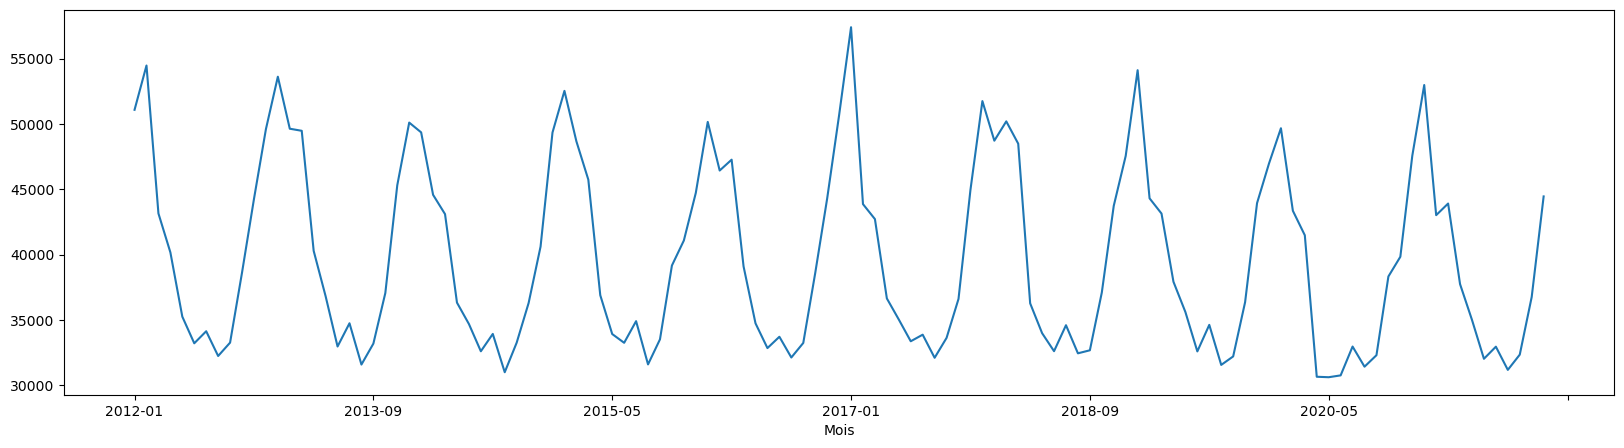

In [23]:
data.index=data.Mois
data["Consommation totale"].plot(figsize=(20,5))

In [24]:
data["Consommation totale"].describe() 

count      119.000000
mean     39613.798319
std       7050.614648
min      30622.000000
25%      33267.500000
50%      37063.000000
75%      44653.500000
max      57406.000000
Name: Consommation totale, dtype: float64

## Data Cleaning

### Données manquantes

In [25]:
data["Consommation totale"].isna().sum()

0

### Données dupliquées

In [26]:
data.duplicated().sum()

0

### Dispersion

In [27]:
dispersion_moyenne=data["Consommation totale"].std()/data["Consommation totale"].mean()*100  #dispersion=std/mean*100
dispersion_moyenne   # DISPERSEE (dispersion>50%) ou HOMOGENE (dispersion<50%)

17.798380732659762

In [30]:
Q1=data["Consommation totale"].quantile(0.25)
Q3=data["Consommation totale"].quantile(0.75)
IQR=Q3-Q1

In [31]:
dispersion_mediane=IQR/data["Consommation totale"].median()*100
dispersion_mediane

30.72066481396541

La dispersion moyenne est inférieure à 50%, ce qui indique que la consommation énergétique est homogène par rapport à la moyenne. La même observation s'applique à la médiane, puisque la dispersion médiane est de 30%.

In [37]:
# Sélectionner uniquement les colonnes numériques pour le calcul de la dispersion
numeric_data = data.select_dtypes(include=[float, int])

# Calculer la dispersion
dispersion = numeric_data.std() / numeric_data.mean() * 100

# Trier les valeurs de dispersion
dispersion_sorted = dispersion.sort_values()

dispersion_sorted


Production totale                            14.541259
Production nucléaire                         14.622644
Production bioénergies                       16.828748
Consommation totale                          17.798381
Echanges export                              20.035372
Production hydraulique                       26.348985
Echanges avec l'Italie                       28.517992
Echanges import                              40.205962
Solde exportateur                            47.952216
Production éolien                            49.286582
Echanges avec le Royaume-Uni                 51.303286
Echanges avec la Suisse                      51.941280
Production thermique totale                  53.455896
Production solaire                           57.660048
Production thermique fioul                   59.968573
Production thermique gaz                     62.054208
Production thermique charbon                 92.759922
Echanges avec l'Espagne                     119.499002
Echanges a

<Axes: >

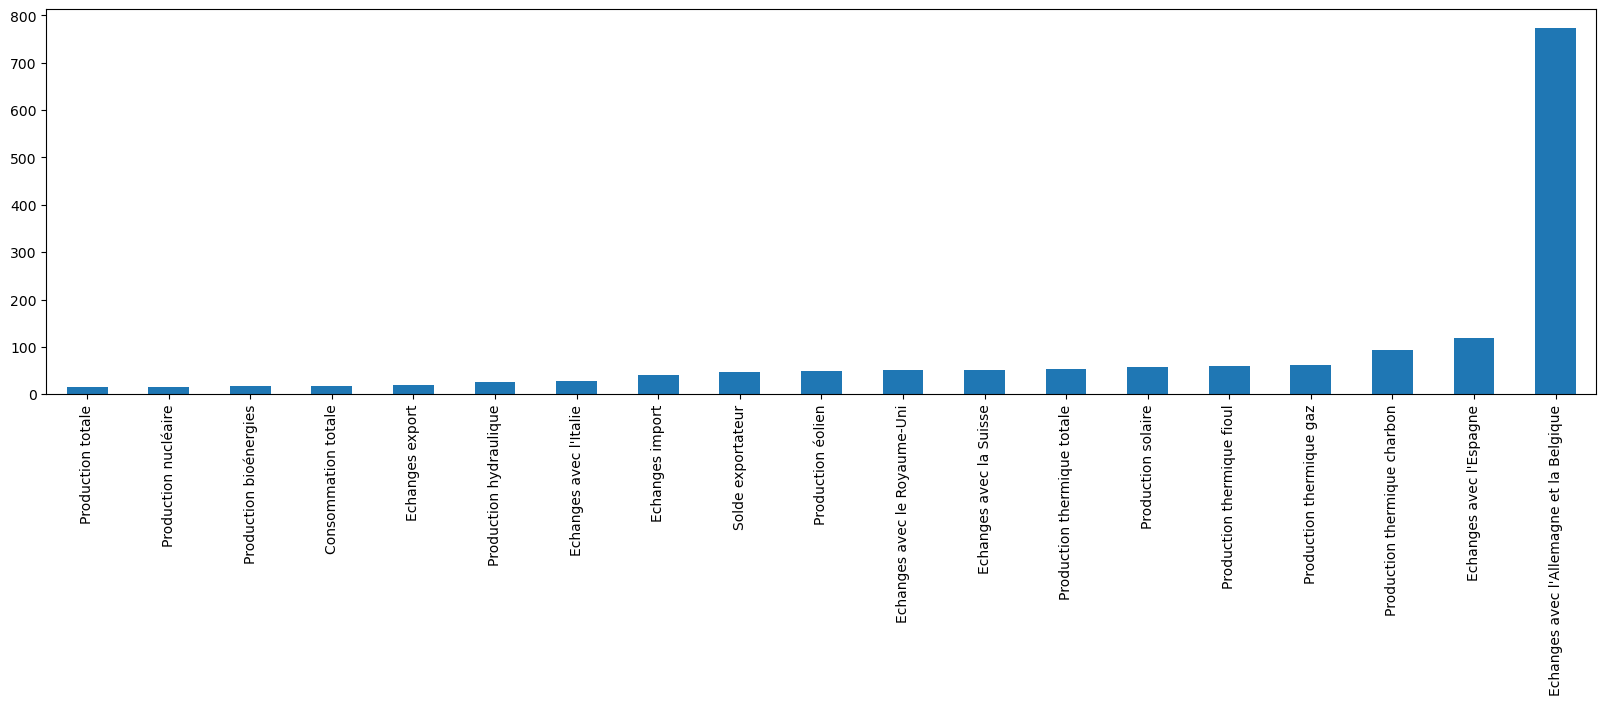

In [38]:
dispersion.sort_values().plot(kind="bar", figsize=(20,5))

### Données aberantes

<Axes: >

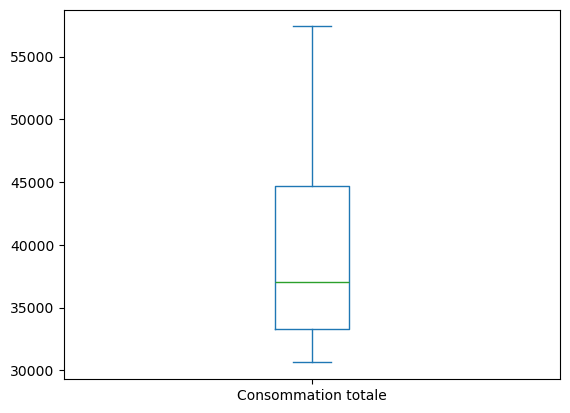

In [32]:
data["Consommation totale"].plot(kind="box")

<Axes: ylabel='Density'>

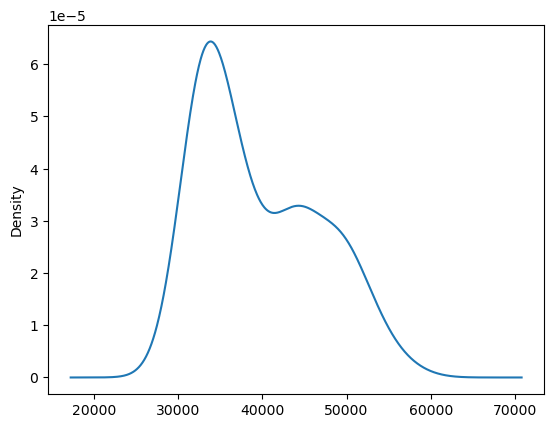

In [33]:
data["Consommation totale"].plot(kind="density")

In [34]:
data["Consommation totale"].skew()

0.5778722028329648

skew>0 donc les français ont tendance à surconsommer

In [35]:
data["Consommation totale"].kurtosis() 

-0.9142022394305473

kurtosis<0 donc il y a pas presomtion de valeurs aberrantes

In [39]:
data2=data.drop(columns=["Mois","Territoire","Qualité"])

#### Méthode de détection des valeurs aberrantes

In [41]:
Q1=data2.quantile(0.25)
Q3=data2.quantile(0.75)
IQR=Q3-Q1
smallest=Q1-1.5*IQR
largest=Q3+1.5*IQR
((data2<smallest) | (data2>largest)).sum().sort_values()

Production totale                           0
Echanges avec l'Italie                      0
Echanges avec l'Espagne                     0
Consommation totale                         0
Echanges avec la Suisse                     0
Production solaire                          0
Production bioénergies                      0
Production thermique gaz                    0
Production thermique totale                 0
Production nucléaire                        0
Production hydraulique                      0
Echanges avec l'Allemagne et la Belgique    1
Echanges export                             2
Production éolien                           3
Echanges import                             3
Production thermique charbon                4
Solde exportateur                           4
Production thermique fioul                  7
Echanges avec le Royaume-Uni                7
dtype: int64

<Axes: >

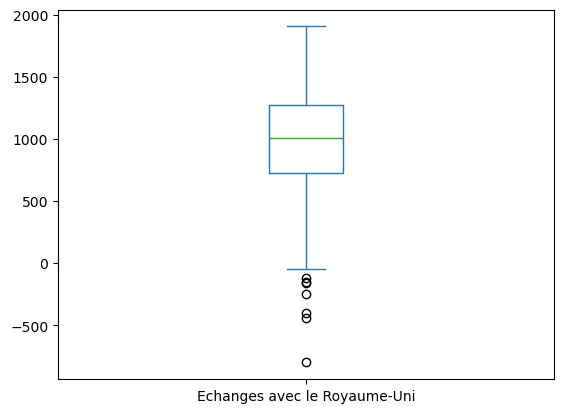

In [42]:
data["Echanges avec le Royaume-Uni"].plot(kind="box")  

<Axes: xlabel='Echanges avec le Royaume-Uni'>

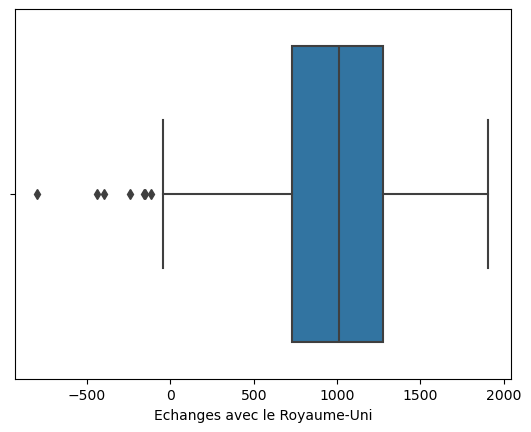

In [43]:
sns.boxplot(x="Echanges avec le Royaume-Uni", data=data)

## Conclusion analyse univariée sur la conso énergetique

Nous disposons de 119 enregistrements sur la consommation énergétique, qui varie de 30,622 à 57,406 avec une moyenne de 39,613. La moitié des consommations est inférieure à 37,063 et 75% des valeurs sont supérieures à 33,267. Cependant, cette consommation énergétique reste homogène, sans valeurs atypiques.

Selon le skewness (skew > 0), les Français ont tendance à consommer davantage au fil du temps. Cependant, la consommation n'évolue pas rapidement, comme en témoigne une kurtosis négative (kurto < 0).

Résume:

- Obséravtions: 119
- Min: 30,622
- Max: 57,406
- Mean: 39,613
- Q1: 33,267
- Q2/Médiane: 37,063
- Dispérsion: < 50% (homogène)
- Donnée manquantes ou dupliquées: NO
- Valeurs aberrantes: NO

---------------

- Skewness/Asymétrie: >0 (distribution asymétrique à droite)
- Kurtosis/Aplatissement: <0 (distribution aplatie par rapport à la normale)

## Test de normalité

**La consommation énergétique des Français est-elle aléatoire ?**

<Axes: ylabel='Density'>

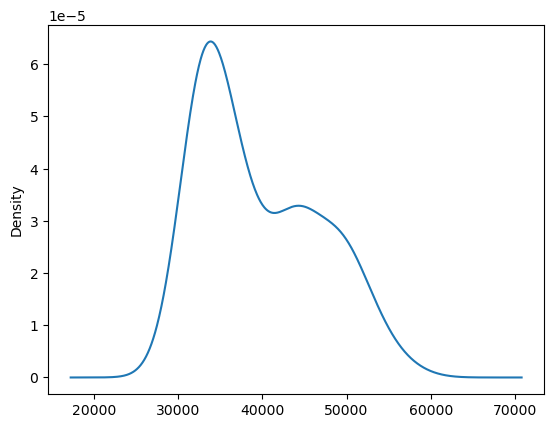

In [45]:
data["Consommation totale"].plot(kind="density")

In [46]:
data["Consommation totale"].skew()

0.5778722028329648

La distribution n'est pas symétrique (skew > 0), elle est décalée vers la droite.

**Est-ce que la consommation énergétique des Français est due au hasard ?**

In [47]:
import scipy.stats
scipy.stats.shapiro(data["Consommation totale"])[1]

5.878083015886659e-07

La valeur de la p-valeur est de 5.88e-07, ce qui est inférieur à 5%. Ainsi, la consommation énergétique n'est pas due au hasard. Cela suggère que la consommation pourrait être expliquée par d'autres facteurs exogènes tels que le temps, la production, les échanges, etc.

In [49]:
# Exclure les colonnes non numériques
numeric_data = data.select_dtypes(include=[float, int])

# Calculer la corrélation
correlation = numeric_data.corr()["Consommation totale"]

correlation

Production totale                           0.957871
Production nucléaire                        0.856117
Production thermique totale                 0.845884
Production thermique charbon                0.498396
Production thermique fioul                  0.393745
Production thermique gaz                    0.760707
Production hydraulique                      0.334905
Production éolien                           0.430462
Production solaire                         -0.682299
Production bioénergies                      0.087580
Consommation totale                         1.000000
Solde exportateur                          -0.438498
Echanges export                            -0.141436
Echanges import                             0.490140
Echanges avec le Royaume-Uni               -0.277523
Echanges avec l'Espagne                    -0.411741
Echanges avec l'Italie                      0.182509
Echanges avec la Suisse                     0.492774
Echanges avec l'Allemagne et la Belgique   -0.

## Test de stationnarité

<Axes: xlabel='Mois'>

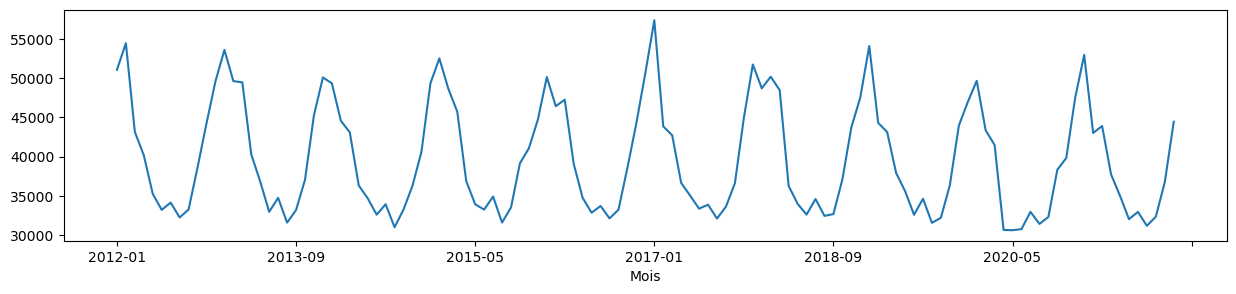

In [51]:
data["Consommation totale"].plot(figsize=(15,3))

**La consommation énergétique est-elle un phénomène temporel ?**

In [52]:
from statsmodels.tsa.stattools import adfuller as DukeyFuller_test
DukeyFuller_test(data["Consommation totale"])[1] 

0.40679928487648853

pvalue>5% on accepte HO donc la serie est temporelle

## Conclusion des tests sur la conso énergetique

Nous avons également constaté que cette consommation pourrait être expliquée par d'autres facteurs exogènes. De plus, nous avons montré qu'elle dépend du temps, ce qui signifie qu'il est crucial de tenir compte de sa temporalité. 

Résume: 

- Test de normalité: pvalue<5% (No hasard/Oui facteurs exogènes)
- Test de stationnarité: pvalue>5% (série temporelle)

## Dépendance ou la corrélation

La corrélation est une mesure statistique qui indique dans quelle mesure deux variables sont liées entre elles. Elle varie de -1 à 1, où 1 indique une corrélation positive parfaite (lorsque l'une augmente, l'autre augmente aussi), -1 indique une corrélation négative parfaite (lorsque l'une augmente, l'autre diminue) et 0 indique l'absence de corrélation linéaire.

In [ ]:
#DEPENDANCE ou CORRELATION AVEC LES AUTRES VARIABLES
# Exclure les colonnes non numériques
numeric_data = data.select_dtypes(include=[float, int])

# Calculer la corrélation avec la colonne "Consommation totale"
correlation = numeric_data.corr()["Consommation totale"] * 100
correlation

## Décomposition de la serie

La série temporelle comprend une tendance, une saisonnalité et des résidus, auxquels peuvent s'ajouter des événements, des jours fériés, des cycles et des connaissances futures.

- Tendance : Modélisée par des fonctions polynomiales telles que ax + b, ax^2 + bx + c, etc.
- Saisonnalité : Modélisée par des fonctions sinusoidales telles que cosinus et sinus.
- Résidus (ou hasard ou bruit blanc) : Modélisée par la loi normale et des fonctions exponentielles.

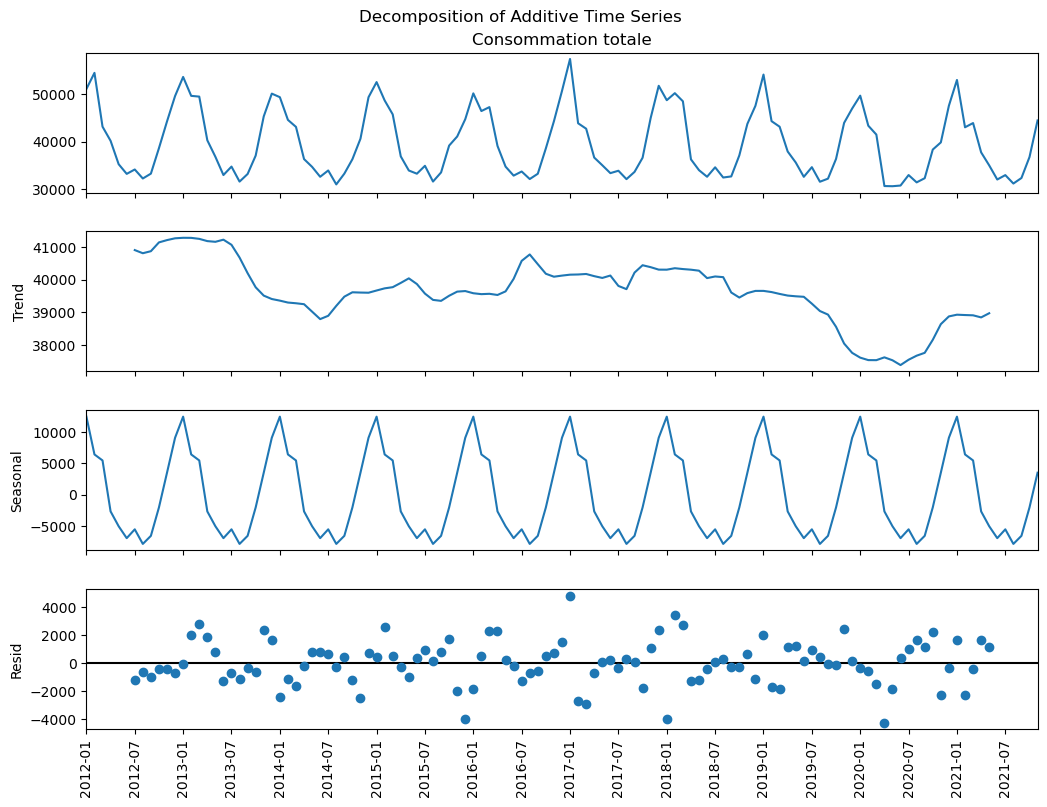

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

y=data['Consommation totale']
# Seasonal residus tendance decomposition
decomposition = seasonal_decompose(y, model='additive', period=12)
fig = decomposition.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of Additive Time Series')

for ax in fig.axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

In [57]:
5000/40000  #notre futur modele pourrait avoir une precision aux alentours de 88% (100-12.5)

0.125

## Correlation partielle et autocorrelation

In [58]:
y.head() #y(t) aujourd'hui, la consommation à l'instant t

Mois
2012-01    51086
2012-02    54476
2012-03    43156
2012-04    40176
2012-05    35257
Name: Consommation totale, dtype: int64

In [59]:
y1=y.shift(1)   #y(t-1): hier, la consommation à l'instant t-1     shift=decalage
y1.head(5)  

Mois
2012-01        NaN
2012-02    51086.0
2012-03    54476.0
2012-04    43156.0
2012-05    40176.0
Name: Consommation totale, dtype: float64

**Est-ce que les données d'aujourd'hui sont corrélées avec les données d'hier ?**

In [60]:
y.corr(y1)

0.7717048131371628

La consommation actuelle peut être expliquée par la consommation précédente à 77%.

**Est-ce que la consommation actuelle est influencée par les consommations des 4 derniers mois ?**

In [63]:
actuelle=y

y1=y.shift(1)   #y(t-1) mois dernier
y2=y.shift(2)   #y(t-2) #il y a deux mois
y3=y.shift(3)   #y(t-3)
y4=y.shift(4)   #y(t-4)
y12=y.shift(12)   #y(t-12)

print(actuelle.corr(y1),actuelle.corr(y2))
print(actuelle.corr(y3) ,actuelle.corr(y4), actuelle.corr(y12))

0.7717048131371628 0.4129179072781297
-0.04191227083666278 -0.43721111218945646 0.9107292662921985


La consommation actuelle est influencée par les consommations passées, à hauteur de 77% il y a 1 mois, 41% il y a 2 mois, et 91% il y a un an.

In [65]:
print(actuelle.corr(y1))
print(actuelle.corr(y2))
print(y1.corr(y2))

0.7717048131371628
0.4129179072781297
0.7763227117436126


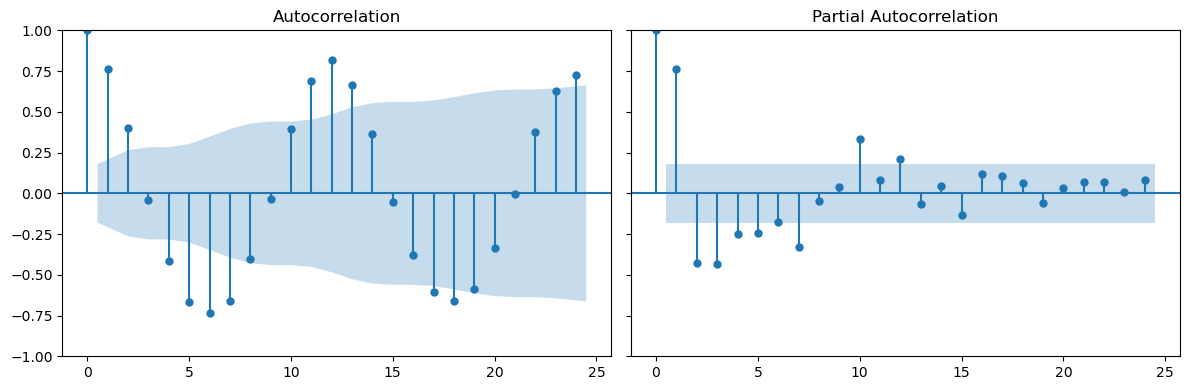

In [66]:
import statsmodels.tsa.api as smt

y=data['Consommation totale']
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(y, lags=24, ax=axes[0])
smt.graphics.plot_pacf(y, lags=24, ax=axes[1])
plt.tight_layout()

Analysez la deuxième courbe pour obtenir les bonnes corrélations :

La valeur actuelle y(t) dépend respectivement des valeurs passées y(t-1), y(t-2), y(t-3), y(t-4) avec des coefficients de corrélation de 77%, -40%, -40%, et -20%.

## Analyse Statistique Bivariée ou Multivariée

La décomposition de la série temporelle en tendance, saisonnalité, et bruit, ainsi que les analyses d'autocorrélation et autocorrélation partielle, fournissent des bases solides pour l'évaluation de la dynamique interne de la consommation énergétique. 

Pour approfondir, l'ajout d'une analyse de corrélation entre la consommation énergétique et d'autres variables clés, telles que la production d'énergie, les échanges d'énergie et les conditions météorologiques, enrichit notre compréhension des facteurs externes influençant la consommation

### Covariance de conso avec les autres variables

<Axes: xlabel='Mois'>

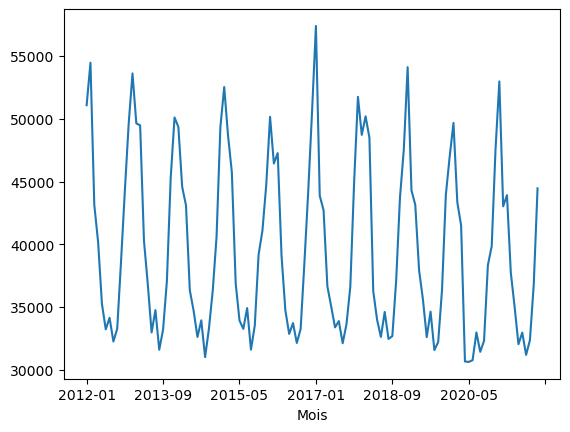

In [70]:
data["Consommation totale"].plot()

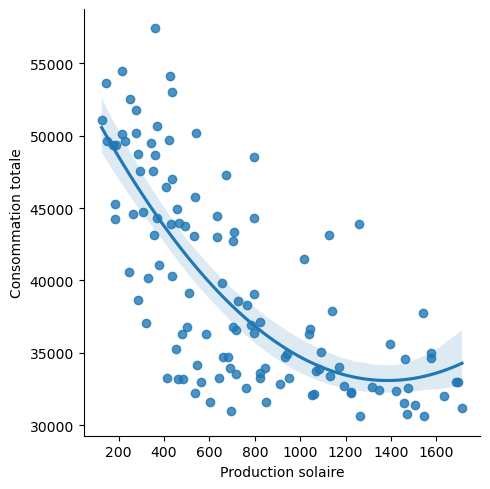

In [71]:
sns.lmplot(x="Production solaire", y="Consommation totale", order=2,data=data);

In [72]:
# Exclure les colonnes non numériques
numeric_data = data.select_dtypes(include=[float, int])

# Calculer la covariance avec la colonne "Consommation totale"
covariance = numeric_data.cov()["Consommation totale"]

covariance

Production totale                           4.374257e+07
Production nucléaire                        2.849372e+07
Production thermique totale                 1.081206e+07
Production thermique charbon                2.283215e+06
Production thermique fioul                  4.246818e+05
Production thermique gaz                    8.104196e+06
Production hydraulique                      3.318000e+06
Production éolien                           3.111334e+06
Production solaire                         -2.065394e+06
Production bioénergies                      7.363833e+04
Consommation totale                         4.971117e+07
Solde exportateur                          -6.247448e+06
Echanges export                            -1.372365e+06
Echanges import                             3.790934e+06
Echanges avec le Royaume-Uni               -9.372295e+05
Echanges avec l'Espagne                    -2.008019e+06
Echanges avec l'Italie                      5.380298e+05
Echanges avec la Suisse        

Interprétation de la Covariance :

Si la covariance entre deux variables x et y est supérieure à zéro, cela signifie que y évolue positivement avec x. En d'autres termes, lorsque x augmente, y a tendance à augmenter également.

Évolution de la Consommation d'Énergie en Fonction des Types de Production :

Dans le cas de la consommation d'énergie, elle évolue positivement avec tous les types de production, sauf pour l'énergie solaire. En revanche, elle évolue négativement avec les échanges extérieurs, à l'exception de l'Italie et de la Suisse ainsi que pour les échanges d'importation.

Questionnement sur l'Impact de la Production Solaire sur la Consommation :

La question qui se pose est pourquoi la production solaire n'impacte pas positivement la consommation ? Il est important de noter que la production solaire peut être influencée par divers facteurs, notamment les conditions météorologiques telles que l'ensoleillement et la température. Si la température est élevée, la demande en électricité pour la climatisation peut augmenter, ce qui pourrait compenser toute augmentation de la production solaire. De plus, la production solaire peut ne pas être suffisante pour répondre à la demande totale d'électricité, ce qui signifie que d'autres sources d'énergie doivent être utilisées pour compléter la production.

In [74]:
# Exclure les colonnes non numériques
numeric_data = data.select_dtypes(include=[float, int])

# Calculer la corrélation absolue avec la colonne "Consommation totale"
corr = numeric_data.corr()["Consommation totale"].abs().sort_values()

corr

Production bioénergies                      0.087580
Echanges export                             0.141436
Echanges avec l'Italie                      0.182509
Echanges avec le Royaume-Uni                0.277523
Production hydraulique                      0.334905
Production thermique fioul                  0.393745
Echanges avec l'Espagne                     0.411741
Production éolien                           0.430462
Solde exportateur                           0.438498
Echanges import                             0.490140
Echanges avec la Suisse                     0.492774
Production thermique charbon                0.498396
Production solaire                          0.682299
Echanges avec l'Allemagne et la Belgique    0.695744
Production thermique gaz                    0.760707
Production thermique totale                 0.845884
Production nucléaire                        0.856117
Production totale                           0.957871
Consommation totale                         1.

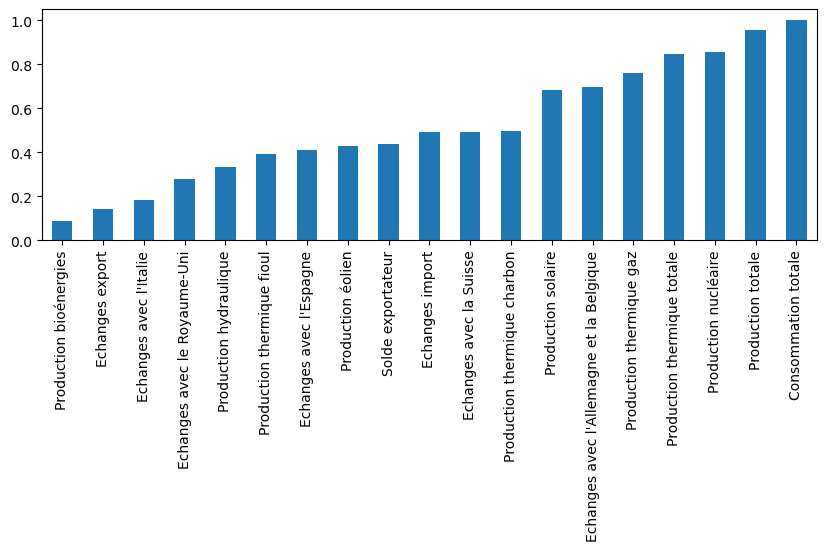

In [75]:
corr.plot(kind="bar", figsize=(10,3));

## Modèle de lissage (Smoothing Model)

In [76]:
y=data['Consommation totale']
y

Mois
2012-01    51086
2012-02    54476
2012-03    43156
2012-04    40176
2012-05    35257
           ...  
2021-07    32959
2021-08    31184
2021-09    32350
2021-10    36762
2021-11    44458
Name: Consommation totale, Length: 119, dtype: int64

<Axes: xlabel='Mois'>

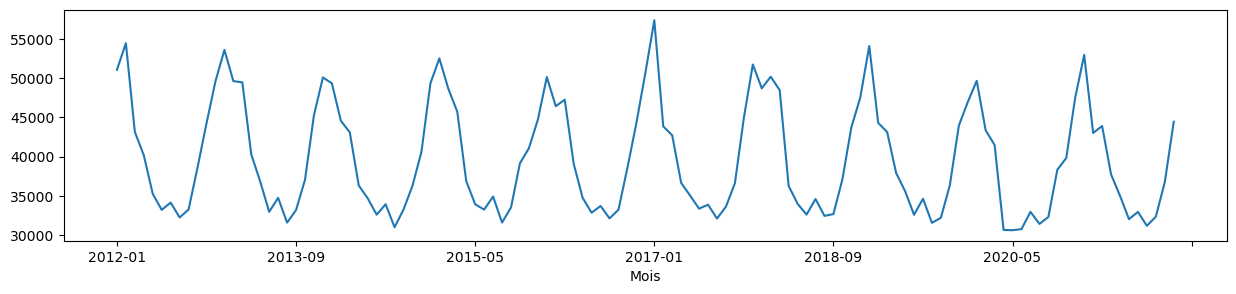

In [77]:
y.plot(figsize=(15,3))

https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [79]:
y_train=y[0:100]  #le modele va s'entrainer avec 100 donnees (souvent on prends 75-80-85%)
y_train

Mois
2012-01    51086
2012-02    54476
2012-03    43156
2012-04    40176
2012-05    35257
           ...  
2019-12    46974
2020-01    49676
2020-02    43358
2020-03    41486
2020-04    30658
Name: Consommation totale, Length: 100, dtype: int64

In [80]:
y_test=y[100:119] #On garde une vingtaine de donnees pour tester ou valider le modele
y_test

Mois
2020-05    30622
2020-06    30763
2020-07    32970
2020-08    31428
2020-09    32307
2020-10    38332
2020-11    39840
2020-12    47565
2021-01    52983
2021-02    43024
2021-03    43913
2021-04    37747
2021-05    35007
2021-06    32032
2021-07    32959
2021-08    31184
2021-09    32350
2021-10    36762
2021-11    44458
Name: Consommation totale, dtype: int64

In [81]:
#complifions notre modele en lui donnant d'autres informations comme la saisonnalité
y_train=y[0:100]  #le modele va s'entrainer avec 100 donnees   (souvent on prends 75-80-85%)
y_test=y[100:119] #On garde une vingtaine de donnees pour tester ou valider le modele
#maintenant on entraine le modele(fit) en rajoutant la tendance et la saisonalité
model = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add').fit()
y_prediction = model.forecast(19) #on fait une prediction sur les 19 prochains mois
y_prediction

C:\Users\Catello\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2020-05-01    31854.521448
2020-06-01    29628.888442
2020-07-01    30917.346342
2020-08-01    28104.814666
2020-09-01    29738.896914
2020-10-01    34090.573599
2020-11-01    39080.629722
2020-12-01    44614.508292
2021-01-01    47503.027210
2021-02-01    43313.019422
2021-03-01    42232.225585
2021-04-01    33927.454310
2021-05-01    30748.987303
2021-06-01    28523.354298
2021-07-01    29811.812197
2021-08-01    26999.280522
2021-09-01    28633.362769
2021-10-01    32985.039454
2021-11-01    37975.095577
Freq: MS, dtype: float64

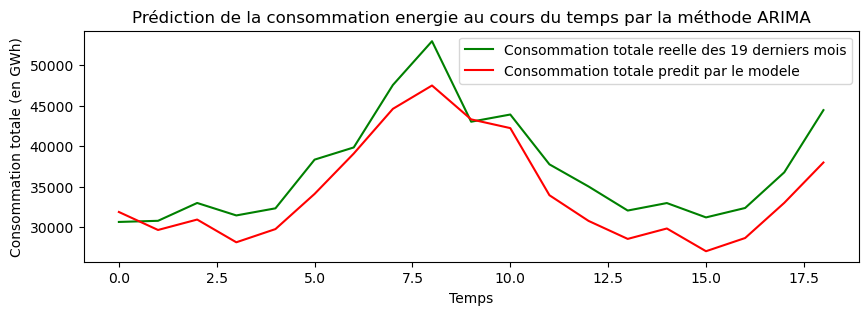

In [82]:
plt.figure(figsize=(10,3))
plt.plot(y_test.values, label='Consommation totale reelle des 19 derniers mois', color='green')
plt.plot(y_prediction.values, label='Consommation totale predit par le modele ', color='red')
plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation energie au cours du temps par la méthode ARIMA')
plt.legend(loc='best')
plt.show()

In [83]:
resultat=pd.DataFrame() #On cree un dataframe pour stocker les erreurs
resultat["realite"]=y_test #la realité
resultat["prevision"]=y_prediction #la prediction
resultat["erreur_absolue"]=resultat["prevision"]-resultat["realite"]  #erreur absolue
resultat["erreur_relative"]=resultat["erreur_absolue"]/resultat["realite"]*100 #erreur relative

resultat   

,realite,prevision,erreur_absolue,erreur_relative
Mois,,,,
2020-05,30622,31854.521448,1232.521448,4.024954
2020-06,30763,29628.888442,-1134.111558,-3.686609
2020-07,32970,30917.346342,-2052.653658,-6.225822
2020-08,31428,28104.814666,-3323.185334,-10.573964
2020-09,32307,29738.896914,-2568.103086,-7.949061
2020-10,38332,34090.573599,-4241.426401,-11.064975
2020-11,39840,39080.629722,-759.370278,-1.906050
2020-12,47565,44614.508292,-2950.491708,-6.203073
2021-01,52983,47503.027210,-5479.972790,-10.342889


<Axes: xlabel='Mois'>

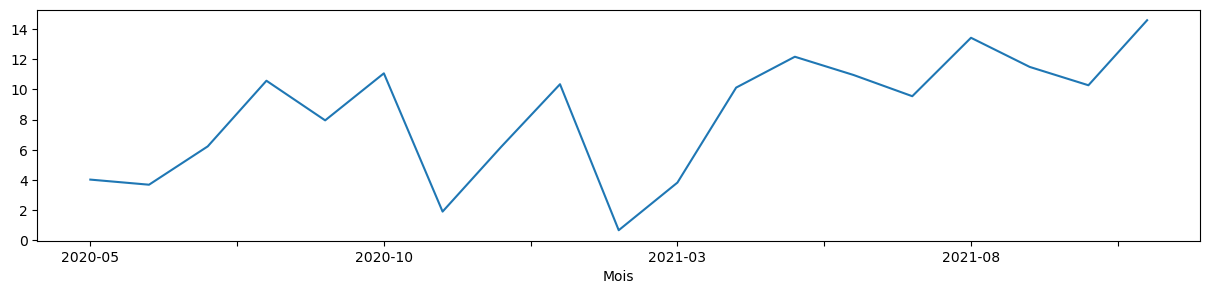

In [84]:
resultat.erreur_relative.abs().plot(figsize=(15,3))

<Axes: >

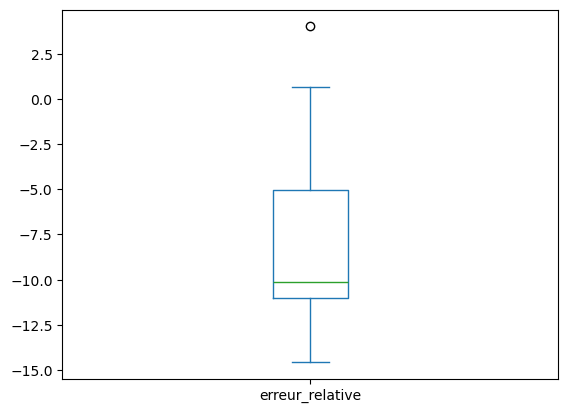

In [85]:
resultat.erreur_relative.plot(kind="box") #75% des predictions sont sous-estimées avec des erreurs de plus de 5%

In [86]:
resultat.erreur_relative.mean() 

-7.875377536008415

In [87]:
100-7.85

92.15

on a une erreur generale de l'ordre de 8%, ce qui est beaucoup!

## ARIMA

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

**order=(p,q,d)**
- p=nombre de mois du passé pris en compte pour le modele
- q=nombre de residus du passé prises en compte pour le modele
- d=le nombre de fois qu'on devrait deriver la serie pour la rendre stationnaire

**seasonal_order = (P,D,Q, FREQUENCE)**
- P=nombre de mois du passé pris en compte pour le modele avec les donnees saisonnieres
- Q=nombre de residus du passé prises en compte pour le modele avec les donnees saisonnieres
- D=le nombre de fois qu'on devrait deriver la serie pour la rendre stationnaire avec les donnees saisonnieres


In [116]:
model = SARIMAX(y_train, order=(6,0,6), seasonal_order = (6,0,6, 12))   #SARIMAX(p, d, q)x(P, D, Q, s)
results = model.fit()
results.summary();

C:\Users\Catello\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


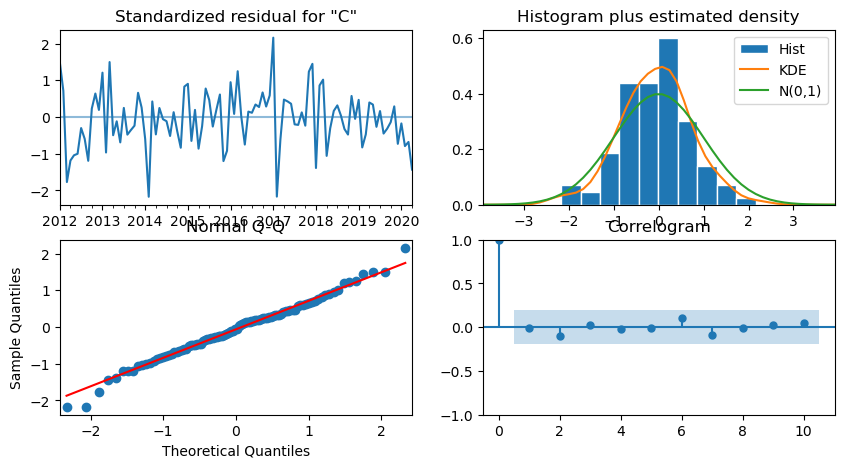

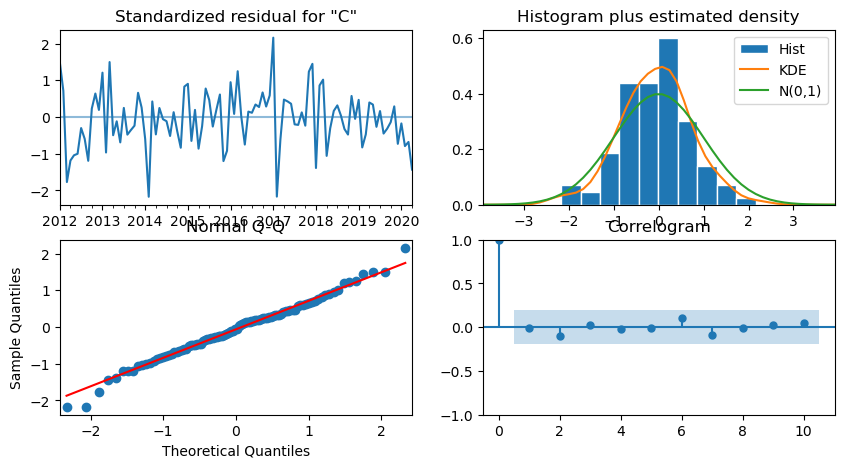

In [94]:
results.plot_diagnostics(figsize=(10,5))

In [95]:
predictions=results.forecast(steps=19)
predictions

2020-05-01    31500.200331
2020-06-01    30486.112988
2020-07-01    32405.143944
2020-08-01    31542.790112
2020-09-01    32647.338228
2020-10-01    36452.322297
2020-11-01    43039.929155
2020-12-01    48006.228178
2021-01-01    50314.912668
2021-02-01    45344.913781
2021-03-01    43255.235401
2021-04-01    35712.459301
2021-05-01    33777.728525
2021-06-01    31816.129502
2021-07-01    33452.342914
2021-08-01    31212.270888
2021-09-01    31819.821887
2021-10-01    35774.073835
2021-11-01    42448.211795
Freq: MS, Name: predicted_mean, dtype: float64

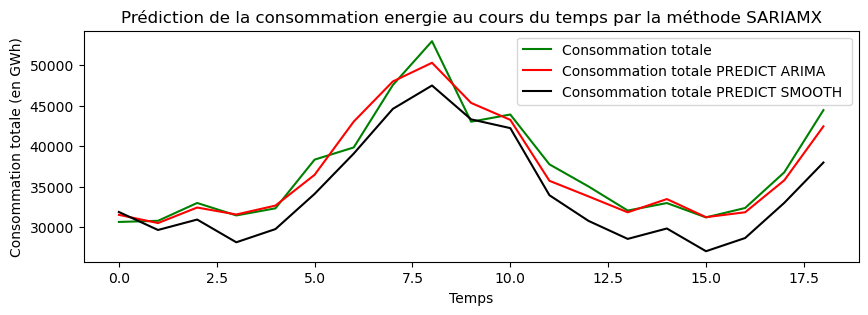

In [96]:
plt.figure(figsize=(10,3))
plt.plot(y_test.values, label='Consommation totale', color='green')

plt.plot(predictions.values, label='Consommation totale PREDICT ARIMA', color='red')
plt.plot(y_prediction.values, label='Consommation totale PREDICT SMOOTH ', color='black')

plt.ylabel('Consommation totale (en GWh)')
plt.xlabel('Temps')
plt.title('Prédiction de la consommation energie au cours du temps par la méthode SARIAMX')
plt.legend(loc='best')
plt.show()

<Axes: xlabel='Mois'>

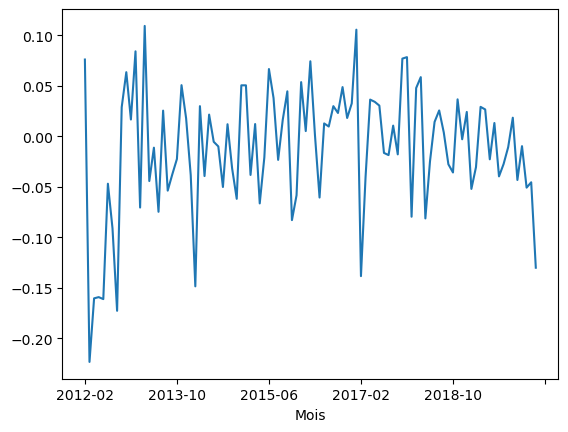

In [98]:
erreur=results.resid[1:]
(erreur/y_train[1:]).plot()

               0
count  19.000000
mean    0.006445
std     0.035424
min    -0.080320
25%    -0.009905
50%     0.009001
75%     0.030994
max     0.053899


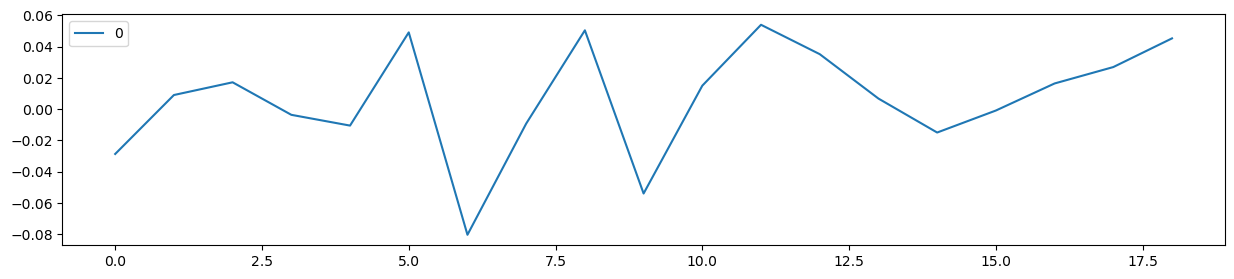

In [99]:
erreur_relative=pd.DataFrame(((y_test.values-predictions.values)/y_test.values))
print(erreur_relative.describe())
erreur_relative.plot(figsize=(15,3));

En moyenne on comment des erreurs de l'ordre de 0.03% (par contre, il faut appronfondir cet analyse)